In [4]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1. Creating a 6*8 Image

#### 1.1 A Grayscale Image

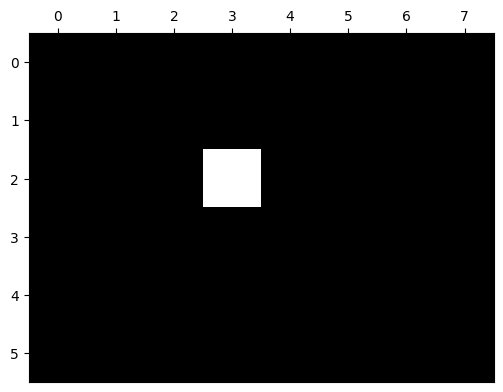

In [6]:
im = np.zeros((6,8), dtype=np.uint8)
im[2,3] = 255
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.xaxis.set_ticks_position('top')
plt.show()

#### 1.2 A Colour Image

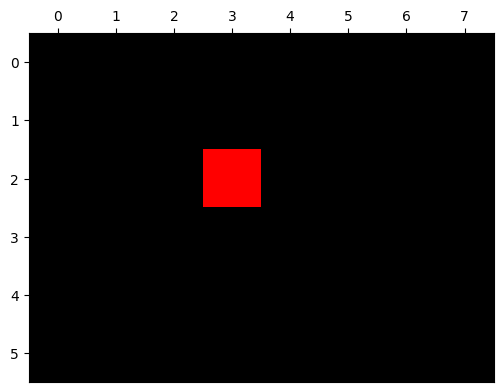

In [7]:
im = np.zeros((6,8,3), dtype=np.uint8)
im[2,3] = [255, 0, 0]
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

### 2. Image Opening and Displaying

#### 2.1 Displaying using Matplotlib

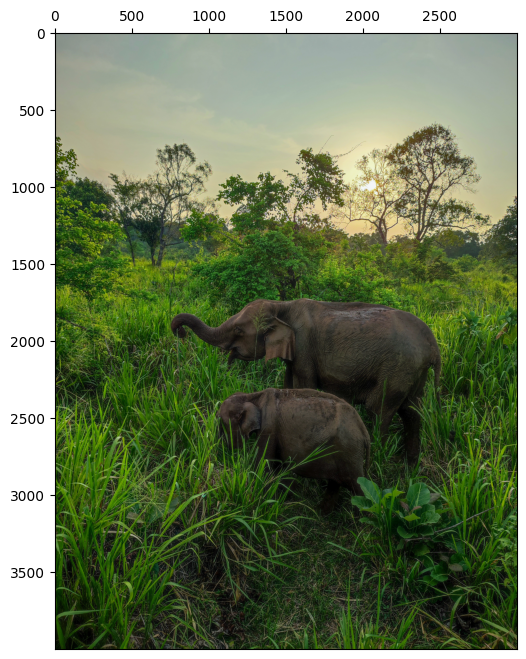

In [8]:
im = cv.imread('images/elephants.jpg')
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

#### 2.2 Displaying using OpenCV

In [9]:
im = cv.imread('images/elephants.jpg')

# Resize to fit screen (e.g., 800×600)
scale_percent = 20  # percent of original size
width = int(im.shape[1] * scale_percent / 100)
height = int(im.shape[0] * scale_percent / 100)
resized = cv.resize(im, (width, height), interpolation=cv.INTER_AREA)

cv.imshow('Image', resized)
cv.waitKey(0)
cv.destroyAllWindows()

### 3. Image Properties

In [10]:
print(f'Images Shape : {im.shape}')
print(f'Images Size : {im.size}')
print(f'Image Data Type : {im.dtype}')

Images Shape : (4000, 3000, 3)
Images Size : 36000000
Image Data Type : uint8


### 4. Increasing the Brightness

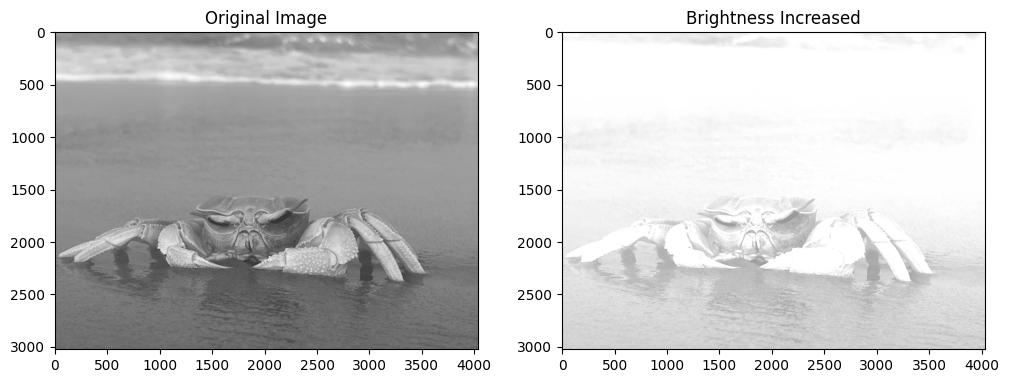

In [11]:
im_1 = cv.imread('images/crab.jpg', cv.IMREAD_GRAYSCALE)
im_2 = cv.add(im_1, 100)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im_2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Brightness Increased")

#for a in ax:
    #a.axis('off')

plt.show()

### 5. Obtaining One Colour Plane

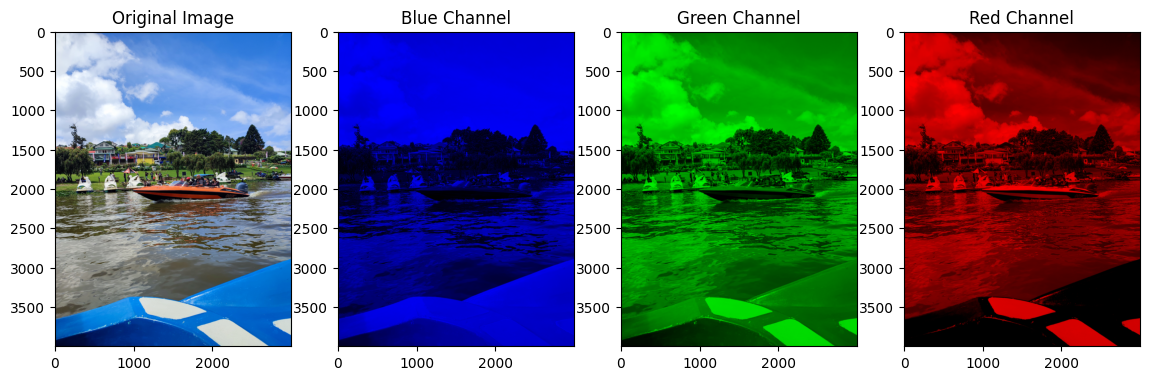

In [12]:
im = cv.imread('images/colourful.jpg') # BGR image
im_blue = im.copy()
im_blue[:, :, 1] = 0
im_blue[:, :, 2] = 0

im_green = im.copy()
im_green[:, :, 0] = 0
im_green[:, :, 2] = 0

im_red = im.copy()
im_red[:, :, 0] = 0
im_red[:, :, 1] = 0

fig, ax = plt.subplots(1, 4, figsize=(14, 12))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_blue, cv.COLOR_BGR2RGB))
ax[1].set_title('Blue Channel')
ax[2].imshow(cv.cvtColor(im_green, cv.COLOR_BGR2RGB))
ax[2].set_title('Green Channel')
ax[3].imshow(cv.cvtColor(im_red, cv.COLOR_BGR2RGB))
ax[3].set_title('Red Channel')

plt.show()


### 6. Sampling and Reconstruction

### 7. Image Resampling and Interpolation

### 8. Intensity Transformations